In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn import tree
import statistics

In [39]:
# 1NN exercise

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Obtaining dependency information for docutils>=0.3 from https://files.pythonhosted.org/packages/26/87/f238c0670b94533ac0353a4e2a1a771a0cc73277b88bff23d3ae35a256c1/docutils-0.20.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/572.7 kB ? eta -:--:--
   -- ------------------------------------ 30.7/572.7 kB 660.6 kB/s eta 0:00:01
   ---------- ----------------------------- 143.4/572.7 kB 1.7 MB/s eta 0:00:01
   ---------------------------------- ----- 491.5/572.7 kB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 572.7/572.7 kB 4.5 MB/s eta 0:00:00
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any

In [298]:
work_folder="C:/Users/l/Desktop/CS760/hw3/hw3Data/"
file_name="D2z.txt"
file=work_folder+file_name
file
original_data=np.loadtxt(file)
original_data

array([[-0.333338  , -0.0871707 ,  0.        ],
       [-1.53173   ,  0.358194  ,  1.        ],
       [ 1.54959   , -0.36405   ,  0.        ],
       [-1.34991   ,  0.252063  ,  1.        ],
       [ 1.28385   , -0.531146  ,  0.        ],
       [-1.36414   ,  0.623197  ,  1.        ],
       [ 0.596974  ,  0.0471854 ,  1.        ],
       [-1.62028   , -0.214322  ,  1.        ],
       [-1.2752    ,  0.409967  ,  1.        ],
       [-0.244046  ,  1.04007   ,  1.        ],
       [-0.21654   , -0.59097   ,  0.        ],
       [ 0.496728  ,  0.212458  ,  1.        ],
       [-0.91148   ,  1.01984   ,  1.        ],
       [-0.463668  ,  1.117     ,  1.        ],
       [ 0.575942  , -1.08807   ,  0.        ],
       [-1.54674   ,  0.324991  ,  1.        ],
       [-1.53841   , -0.205687  ,  1.        ],
       [-0.94811   ,  0.853448  ,  1.        ],
       [ 0.843527  , -0.819308  ,  0.        ],
       [-1.27073   ,  0.495975  ,  1.        ],
       [-0.629323  ,  0.103917  ,  0.   

In [299]:
def distance(x,y):
    return np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)
distance([1,1],[2,2])

1.4142135623730951

In [300]:
def nearest_point(x,data):
    distances=[]
    for point in data:
        distances.append(distance(x,point))
    nearest_point_index=distances.index(min(distances))
    return data[nearest_point_index]
nearest_point([0,0,1],original_data)

array([-0.333338 , -0.0871707,  0.       ])

In [301]:
def predict(x,data):
    return nearest_point(x,data)[2]
predict([0,0,1],original_data)

0.0

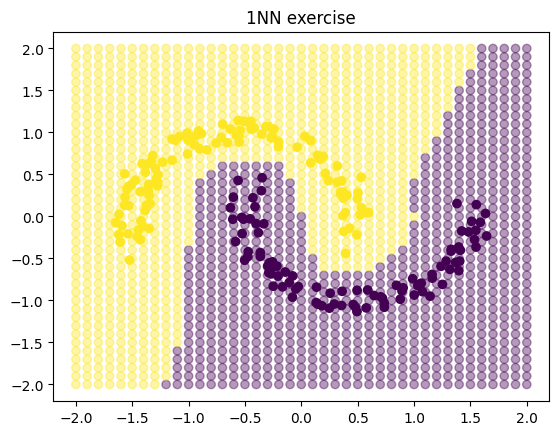

In [302]:
data=original_data
xx,yy=np.meshgrid(np.arange(-2,2.1,0.1),np.arange(-2,2.1,0.1))
z=[]
for point in np.c_[xx.ravel(),yy.ravel()]:
    z=z+[predict(point,data)]
z=np.array(z).reshape(xx.shape)

plt.scatter(xx,yy,c=z,alpha=0.4)
plt.scatter(data[:,0],data[:,1],c=data[:,2],alpha=1)
plt.title("1NN exercise")
plt.show()  

In [ ]:
#2 spam emails

In [45]:
work_folder="C:/Users/l/Desktop/CS760/hw3/hw3Data/"
file_name="emails.csv"
file=work_folder+file_name
file
original_data=pd.read_csv(file).to_numpy()
original_data


X=original_data[:,1:-1]
Y=original_data[:,-1]

X=(X-np.mean(X,axis=0))/np.sqrt(np.var(X,axis=0).astype(float))

In [8]:
def distance(x,y):
    return np.sqrt(sum((x-y)**2))
distance(np.array([1,1,1,2]),np.array([2,2,2,2]))


1.7320508075688772

In [102]:
dist_matrix=np.zeros((X.shape[0],X.shape[0]))
dist_matrix.shape

(5000, 5000)

In [14]:
num=X.shape[0]
# dist_matrix=np.zeros((num,num))
# for i in range(0,num):
#     for j in range(i,num):
#         dist_matrix[i,j]=distance(X[i],X[j])

for i in range(0,num):
    for j in range(0,i):
        dist_matrix[i,j]=dist_matrix[j,i]

In [3]:
dist_matrix=np.loadtxt("distance_matrix.csv",delimiter=",")

In [111]:
np.savetxt('distance_matrix.csv', dist_matrix, delimiter=',')

In [89]:
def predict_knn(x,X,Y,k):
    distances=[]
    for point in X:
        distances.append(distance(x,point))
    smallest_indices = np.argsort(distances)[:5]
    return statistics.mode(Y[smallest_indices])
    # if np.mean(Y[smallest_indices])<0.5 :
    #     return 0
    # else :
    #     return 1
    
predict_knn(X[0],X,Y,5)

0

In [ ]:
# dont use
result=pd.DataFrame(columns=["Fold","Accuracy","Precision","Recall"])
for i in range(1,6):
    split_data=np.split(original_data,[(i-1)*1000,i*1000])
    train_set=np.vstack((split_data[0],split_data[2]))
    test_set=split_data[1]
    X_train=train_set[:,1:-1]
    Y_train=train_set[:,-1]
    X_test=test_set[:,1:-1]
    Y_test=test_set[:,-1]
    
    Y_predict=[]
    for x in X_test:
        Y_predict.append(predict_knn(x,X_train,Y_train,5))
    print(Y_predict-Y_test)
    break

    

In [4]:
def Accuracy(predict,test):
    return np.mean(predict==test)

def Precision(predict,test):
    true_positive=np.sum((test==1)&(predict==1))
    false_positive=np.sum((test==0)&(predict==1))
    return true_positive/(true_positive+false_positive)

def Recall(predict,test):
    true_positive=np.sum((test==1)&(predict==1))
    false_negative=np.sum((test==1)&(predict==0))
    return true_positive/(true_positive+false_negative)
 

In [314]:
#2 compute distance at real time is too time-spending, so I compute all the distance between points before.
result=pd.DataFrame(columns=["Fold","Accuracy","Precision","Recall"])
for i in range(1,6):
    if i==1:
        train_index=np.array(list(range(0,(i-1)*1000))+list(range(i*1000,5000)))
        test_index=np.array(list(range((i-1)*1000,i*1000)))
    else:
        train_index=np.array(list(range(0,(i-1)*1000-1))+list(range(i*1000,5000)))
        test_index=np.array(list(range((i-1)*1000-1,i*1000)))
        

    Y_test=[]
    Y_predict=[]
    for j in test_index:
        Y_test.append(original_data[j,-1])
        distances=dist_matrix[j,train_index]
        smallest_indices = train_index[np.argsort(distances)[:1]]
        Y_predict.append(statistics.mode(original_data[smallest_indices,-1]))

    Y_test=np.array(Y_test)
    Y_predict=np.array(Y_predict)
    accuracy=Accuracy(Y_predict,Y_test)
    precision=Precision(Y_predict,Y_test)
    recall=Recall(Y_predict,Y_test)
    result.loc[len(result)]=np.array([i,accuracy,precision,recall])

result

    

,Fold,Accuracy,Precision,Recall
0,1.0,0.835000,0.656250,0.884211
1,2.0,0.864136,0.689008,0.927798
2,3.0,0.870130,0.724638,0.877193
3,4.0,0.854146,0.711429,0.846939
4,5.0,0.819181,0.654321,0.866013


In [306]:
print(result.round(3).to_latex())

\begin{tabular}{lrrrr}
\toprule
 & Fold & Accuracy & Precision & Recall \\
\midrule
0 & 1.000000 & 0.825000 & 0.654000 & 0.821000 \\
1 & 2.000000 & 0.853000 & 0.686000 & 0.866000 \\
2 & 3.000000 & 0.859000 & 0.718000 & 0.832000 \\
3 & 4.000000 & 0.853000 & 0.721000 & 0.816000 \\
4 & 5.000000 & 0.774000 & 0.605000 & 0.755000 \\
\bottomrule
\end{tabular}



In [232]:
i=2
train_index=np.array(list(range(0,(i-10)*1000))+list(range(i*1000,5000)))
test_index=np.array(list(range((i-10)*1000,i*1000)))

Y_test=[]
Y_predict=[]
for j in test_index:
    Y_test.append(original_data[j,-1])
    distances=dist_matrix[j,train_index]
    smallest_indices = train_index[np.argsort(distances)[:1]]
    Y_predict.append(statistics.mode(original_data[smallest_indices,-1]))

Y_test=np.array(Y_test)
Y_predict=np.array(Y_predict)
accuracy=Accuracy(Y_predict,Y_test)
precision=Precision(Y_predict,Y_test)
recall=Recall(Y_predict,Y_test)

IndexError: index -8000 is out of bounds for axis 0 with size 5000

array([1001, 3998])

In [15]:
new_result=pd.DataFrame(columns=["K","Accuracy"])
for k in [1,3,5,7,10]:
    result=pd.DataFrame(columns=["Fold","Accuracy","Precision","Recall"])
    for i in range(1,6):

        if i==1:
            train_index=np.array(list(range(0,(i-1)*1000))+list(range(i*1000,5000)))
            test_index=np.array(list(range((i-1)*1000,i*1000)))
        else:
            train_index=np.array(list(range(0,(i-1)*1000-1))+list(range(i*1000,5000)))
            test_index=np.array(list(range((i-1)*1000-1,i*1000)))
        

        Y_test=[]
        Y_predict=[]
        for j in test_index:
            Y_test.append(original_data[j,-1])
            distances=dist_matrix[j,train_index]
            smallest_indices = train_index[np.argsort(distances)[:k]]
            Y_predict.append(statistics.mode(original_data[smallest_indices,-1]))

        Y_test=np.array(Y_test)
        Y_predict=np.array(Y_predict)
        accuracy=Accuracy(Y_predict,Y_test)
        precision=Precision(Y_predict,Y_test)
        recall=Recall(Y_predict,Y_test)
        result.loc[len(result)]=np.array([i,accuracy,precision,recall])
        # break
    new_result.loc[len(new_result)]=np.array([k,np.mean(result.Accuracy)])
    # break

new_result

,K,Accuracy
0,1.0,0.832932
1,3.0,0.840129
2,5.0,0.840926
3,7.0,0.844922
4,10.0,0.849920


\begin{tabular}{lrr}
\toprule
 & K & Accuracy \\
\midrule
0 & 1.000000 & 0.832900 \\
1 & 3.000000 & 0.841300 \\
2 & 5.000000 & 0.840900 \\
3 & 7.000000 & 0.845700 \\
4 & 10.000000 & 0.849100 \\
\bottomrule
\end{tabular}



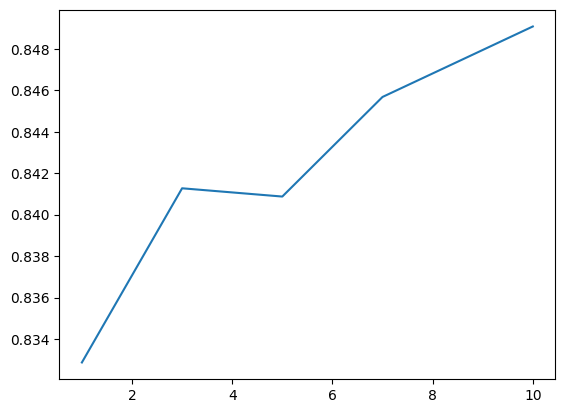

In [308]:
print(new_result.round(4).to_latex())
plt.plot(new_result.K,new_result.Accuracy)

In [291]:
#logisctic
new_result=pd.DataFrame(columns=["L_rate","Accuracy"])
for learning_rate in [0.001]:
    result=pd.DataFrame(columns=["Fold","Accuracy","Precision","Recall"])
    for i in range(1,6):

        if i==1:
            train_index=np.array(list(range(0,(i-1)*1000))+list(range(i*1000,5000)))
            test_index=np.array(list(range((i-1)*1000,i*1000)))
        else:
            train_index=np.array(list(range(0,(i-1)*1000+1))+list(range(i*1000,5000)))
            test_index=np.array(list(range((i-1)*1000+1,i*1000)))
        
        X_train=X[train_index]
        Y_train=Y[train_index]
        X_test=X[test_index]
        Y_test=Y[test_index]

        theta=np.zeros(3000)
        
        for j in range(0,X_train.shape[0]):
            x=X_train[j]
            y=Y_train[j]
            ez=1/(1+np.exp(-np.dot(theta,x)))
            theta=theta+learning_rate*np.dot(x,(y-ez))

        Y_predict=np.array([])
        for k in range(0,X_test.shape[0]):
            if 1/(1+np.exp(-np.dot(theta,X_test[k])))>0.5:
                Y_predict=np.append(Y_predict,1)
            else:
                Y_predict=np.append(Y_predict,0)
            
        accuracy=Accuracy(Y_predict,Y_test)
        precision=Precision(Y_predict,Y_test)
        recall=Recall(Y_predict,Y_test)
        result.loc[len(result)]=np.array([i,accuracy,precision,recall])
        # break
    # break
    result 
    new_result.loc[len(new_result)]=np.array([learning_rate,np.mean(result.Accuracy)])
new_result
    

,L_rate,Accuracy
0,0.001,0.918742


In [296]:
print(result.round(2).to_latex())

\begin{tabular}{lrrrr}
\toprule
 & Fold & Accuracy & Precision & Recall \\
\midrule
0 & 1.000000 & 0.880000 & 0.710000 & 0.990000 \\
1 & 2.000000 & 0.930000 & 0.810000 & 0.980000 \\
2 & 3.000000 & 0.940000 & 0.850000 & 0.960000 \\
3 & 4.000000 & 0.950000 & 0.870000 & 0.970000 \\
4 & 5.000000 & 0.900000 & 0.790000 & 0.900000 \\
\bottomrule
\end{tabular}



In [30]:
def TPR(predict,test):
    true_positive=np.sum((test==1)&(predict==1))
    false_positive=np.sum((test==0)&(predict==1))

    TPR=true_positive/np.sum(test==1)
    return TPR
def FPR(predict,test):
    true_positive=np.sum((test==1)&(predict==1))
    false_positive=np.sum((test==0)&(predict==1))

    FPR=false_positive/np.sum(test==0)
    return FPR


In [41]:
result=pd.DataFrame(columns=["Threshold","Accuracy","TPR","FPR"])
i=5
for threshold in [0,0.2,0.4,0.6,0.8,1]:
    if i==1:
        train_index=np.array(list(range(0,(i-1)*1000))+list(range(i*1000,5000)))
        test_index=np.array(list(range((i-1)*1000,i*1000)))
    else:
        train_index=np.array(list(range(0,(i-1)*1000))+list(range(i*1000,5000)))
        test_index=np.array(list(range((i-1)*1000,i*1000)))
        

    Y_test=[]
    Y_predict=[]
    for j in test_index:
        Y_test.append(original_data[j,-1])
        distances=dist_matrix[j,train_index]
        smallest_indices = train_index[np.argsort(distances)[:5]]
        prob=np.mean(original_data[smallest_indices,-1])
        if prob>=threshold:
            Y_predict.append(1)
        else:
            Y_predict.append(0)
        # Y_predict.append(statistics.mode(original_data[smallest_indices,-1]))

    Y_test=np.array(Y_test)
    Y_predict=np.array(Y_predict)
    accuracy=Accuracy(Y_predict,Y_test)
    precision=TPR(Y_predict,Y_test)
    recall=FPR(Y_predict,Y_test)
    result.loc[len(result)]=np.array([threshold,accuracy,precision,recall])
result.loc[len(result)]=np.array([0,0,0,0])

result_knn=result

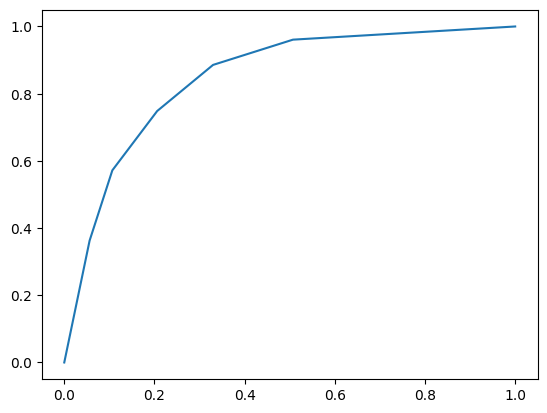

In [42]:
plt.plot(result_knn.iloc[:,3],result_knn.iloc[:,2])

In [46]:
#logisctic
new_result=pd.DataFrame(columns=["L_rate","Accuracy"])
for learning_rate in [0.001]:
    result=pd.DataFrame(columns=["Threshold","Accuracy","TPR","FPR"])
    i=5
    for threshold in [0,0.2,0.4,0.6,0.8,1]:
        if i==1:
            train_index=np.array(list(range(0,(i-1)*1000))+list(range(i*1000,5000)))
            test_index=np.array(list(range((i-1)*1000,i*1000)))
        else:
            train_index=np.array(list(range(0,(i-1)*1000))+list(range(i*1000,5000)))
            test_index=np.array(list(range((i-1)*1000,i*1000)))
        
        X_train=X[train_index]
        Y_train=Y[train_index]
        X_test=X[test_index]
        Y_test=Y[test_index]

        theta=np.zeros(3000)
        
        for j in range(0,X_train.shape[0]):
            x=X_train[j]
            y=Y_train[j]
            ez=1/(1+np.exp(-np.dot(theta,x)))
            theta=theta+learning_rate*np.dot(x,(y-ez))

        Y_predict=np.array([])
        for k in range(0,X_test.shape[0]):
            if 1/(1+np.exp(-np.dot(theta,X_test[k])))>=threshold:
                Y_predict=np.append(Y_predict,1)
            else:
                Y_predict=np.append(Y_predict,0)
            
        Y_test=np.array(Y_test)
        Y_predict=np.array(Y_predict)
        accuracy=Accuracy(Y_predict,Y_test)
        precision=TPR(Y_predict,Y_test)
        recall=FPR(Y_predict,Y_test)
        result.loc[len(result)]=np.array([threshold,accuracy,precision,recall])
    result.loc[len(result)]=np.array([0,0,0,0])

        # break
    # break

result_log=result

    

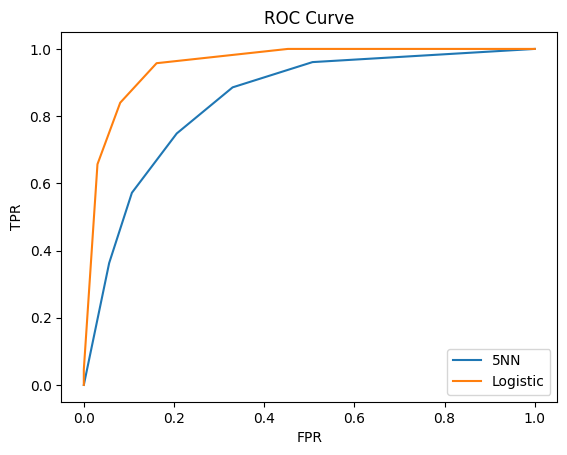

In [51]:
plt.plot(result_knn.iloc[:,3],result_knn.iloc[:,2],label="5NN")
plt.plot(result_log.iloc[:,3],result_log.iloc[:,2],label="Logistic")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend(loc='lower right')